# Exercise 2

This notebook shows how we can perform linear regression on a dataset.

We generate a noisy dataset:

In [2]:
import numpy as np

np.random.seed(0)
n_samples = 1000
X = np.random.rand(n_samples)*10
X = np.expand_dims(X, axis=-1)
noise = np.random.randn(n_samples)*4.0
noise = np.expand_dims(noise, axis=-1)
ground_truth = 5 * X + 3
y = ground_truth + noise

X and y are the features and the label, respectively. We can look at the format of the data:

In [2]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1000, 1)
(1000, 1)
float64
float64


As you can see, X and y are numpy arrays. We generated 1000 samples, with one feature per sample, and y are the corresponding labels for each sample.

## Plotting the data

When working with a dataset, it is always helpful to visualize the data that we are working with, in order to be able to check if our results are meaningful. We will use matplotlib to plot the data.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

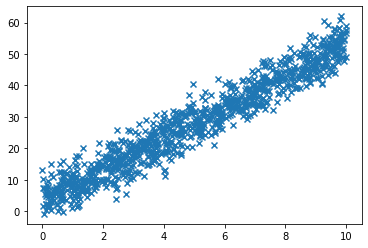

In [4]:
plt.figure()
plt.scatter(X, y, marker="x")
plt.show()

## Performing linear regression with backpropagation

Your tasks in this notebook are:
 - Implement the gradient as in the previous notebook, but this time use the [torch.nn.MSELoss](https://pytorch.org/docs/stable/nn.html#mseloss) class for the loss calculation. Also, use a pytorch optimizer such as [torch.optim.SGD](https://pytorch.org/docs/stable/optim.html#torch.optim.SGD) instead of updating the weights manually. Using an optimizer is done in the following way:
 ```python
 optimizer = optim.SGD([weights], lr=my_learning_rate)
    
 # in the optimization loop:
 optim.zero_grad() # equivalent to weights.grad.zero_()
 # loss calculation here, then
 optim.step() # equivalent to weights -= learning_rate*weights.grad
 ```
 In models with many weight tensors, using an optimizer is way easier than updating them all individually. Also, using different optimizers is as easy as using a different `torch.optim` class.

## Solution

In [12]:
import numpy as np
import torch as pt
ones = np.ones(X.shape)
X_extended = pt.as_tensor(np.c_[X, ones])
num_feat = X_extended.shape[-1]
weights = pt.tensor((np.random.rand(num_feat).reshape(-1, 1) * 2 - 1) / np.sqrt(num_feat), requires_grad=True)
gt = pt.as_tensor(ground_truth)

num_epochs = 500
eta = 0.01
loss_fn = pt.nn.MSELoss()
optimizer = pt.optim.SGD([weights], lr=eta)

for epoch in range(num_epochs):
    prediction = X_extended.matmul(weights)
    loss = loss_fn(prediction, gt)
    print("Loss in epoch %d: %.2f" % (epoch, loss))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Loss in epoch 0: 879.07
Loss in epoch 1: 93.54
Loss in epoch 2: 10.95
Loss in epoch 3: 2.25
Loss in epoch 4: 1.33
Loss in epoch 5: 1.22
Loss in epoch 6: 1.20
Loss in epoch 7: 1.19
Loss in epoch 8: 1.17
Loss in epoch 9: 1.16
Loss in epoch 10: 1.15
Loss in epoch 11: 1.14
Loss in epoch 12: 1.13
Loss in epoch 13: 1.12
Loss in epoch 14: 1.11
Loss in epoch 15: 1.09
Loss in epoch 16: 1.08
Loss in epoch 17: 1.07
Loss in epoch 18: 1.06
Loss in epoch 19: 1.05
Loss in epoch 20: 1.04
Loss in epoch 21: 1.03
Loss in epoch 22: 1.02
Loss in epoch 23: 1.01
Loss in epoch 24: 1.00
Loss in epoch 25: 0.99
Loss in epoch 26: 0.98
Loss in epoch 27: 0.97
Loss in epoch 28: 0.96
Loss in epoch 29: 0.95
Loss in epoch 30: 0.94
Loss in epoch 31: 0.93
Loss in epoch 32: 0.92
Loss in epoch 33: 0.91
Loss in epoch 34: 0.90
Loss in epoch 35: 0.90
Loss in epoch 36: 0.89
Loss in epoch 37: 0.88
Loss in epoch 38: 0.87
Loss in epoch 39: 0.86
Loss in epoch 40: 0.85
Loss in epoch 41: 0.84
Loss in epoch 42: 0.83
Loss in epoch 43:

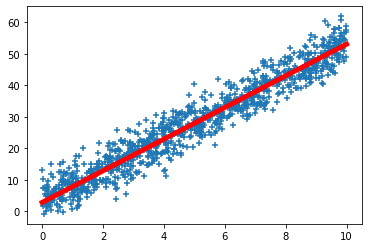

In [13]:
import matplotlib.pyplot as plt
def line_f(x):
    return np.array([x, 1]).dot(weights.detach().numpy())

plt.figure()
plt.scatter(X, y, marker='+')
plt.plot([0, 10], [line_f(0), line_f(10)], linewidth=5, color="red")